In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import svm
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from numpy import random

In [12]:
data = pd.read_csv('../data/processed/sioma-inputs-output-unified_complete_28_weeks.csv', sep=',')
data.shape

(9752, 38)

In [27]:
data.tail(3650)

,Luz (lux),Precipitación (ml),Temperatura (C),Velocidad del viento (Km/h),E,N,NE,NO,O,S,...,PORVL18N3,PORVL18N4,PORVL21N1,PORVL21N2,PORVL21N3,PORVL21N4,PORVL21N5,PORVL24N1,PORVL24N2,pesoRacimo
6102,0.375991,0.000000,0.407309,0.044681,0.0,0.0,0.0,0.0,0.0,1.0,...,0.775670,0.698787,0.742806,0.712605,0.694468,0.707914,0.724393,0.614936,0.777499,0.322095
6103,0.388893,0.000000,0.132415,0.026217,1.0,0.0,0.0,0.0,0.0,0.0,...,0.775670,0.698787,0.742806,0.712605,0.694468,0.707914,0.724393,0.614936,0.777499,0.169714
6104,0.798618,0.000000,0.457097,0.020154,0.0,0.0,0.0,0.0,0.0,1.0,...,0.775670,0.698787,0.742806,0.712605,0.694468,0.707914,0.724393,0.614936,0.777499,0.569714
6105,0.544895,0.000000,0.132415,0.019553,0.0,0.0,0.0,0.0,0.0,0.0,...,0.775670,0.698787,0.742806,0.712605,0.694468,0.707914,0.724393,0.614936,0.777499,0.141143
6106,0.000000,0.000000,0.228284,0.036207,0.0,0.0,0.0,0.0,0.0,1.0,...,0.775670,0.698787,0.742806,0.712605,0.694468,0.707914,0.724393,0.614936,0.777499,0.350667
6107,0.000000,0.000000,0.208686,0.015043,0.0,1.0,0.0,0.0,0.0,0.0,...,0.775670,0.698787,0.742806,0.712605,0.694468,0.707914,0.724393,0.614936,0.777499,0.255429
6108,0.397739,0.000000,0.595869,0.053571,1.0,0.0,0.0,0.0,0.0,0.0,...,0.775670,0.698787,0.742806,0.712605,0.694468,0.707914,0.724393,0.614936,0.777499,0.360190
6109,0.000000,0.000000,0.261653,0.069767,0.0,0.0,0.0,1.0,0.0,0.0,...,0.775670,0.698787,0.742806,0.712605,0.694468,0.707914,0.724393,0.614936,0.777499,0.493524
6110,0.000000,0.000000,0.397246,0.080153,0.0,0.0,0.0,1.0,0.0,0.0,...,0.775670,0.698787,0.742806,0.712605,0.694468,0.707914,0.724393,0.614936,0.777499,0.350667
6111,0.000000,0.000000,0.268008,0.021212,0.0,0.0,0.0,0.0,0.0,0.0,...,0.775670,0.698787,0.742806,0.712605,0.694468,0.707914,0.724393,0.614936,0.777499,0.322095


Vemos que desde el 6216 en adelante es el mismo peso del racimo, porque se llenaron 
con el promedio de los otros cuando habia datos faltantes, entonces muchos de ellos 
obtuvieron un mismo valor. Detallamos cuales de ellos no se repiten y con esas muestras nos quedaremos.

In [29]:
#data_without_duplicates = data.drop_duplicates(subset=['pesoRacimo'],keep="first")
#data_without_duplicates

In [30]:
data = np.array(data)

# 80% de los datos

In [31]:
# Tomamos el 80% de los datos de 6116 en total
6116 * 0.8


4892.8

In [32]:
# Tomamos 4893 datos para entrenamiento
train   = data[0:4893,0:37]
y_train = data[0:4893,37]
print(train.shape)
print(y_train.shape)

In [33]:
# Tomamos 4893 datos para entrenamiento

(4893, 37)
(4893,)


# 20% de los datos

In [35]:
#20% de los datos
test   = data[4893:6116,0:37]
y_test = data[4893:6116,37]
print(test.shape)
print(y_test.shape)

(1223, 37)
(1223,)


## Cuando consideramos conjunto de datos de validación 

In [37]:
validation   = data[4893:5505,0:37]
y_validation = data[4893:5505,37]

test2   = data[5505:6116,0:37]
y_test2 = data[5505:6116,37]
print(test2.shape)
print(y_test2.shape)

(611, 37)
(611,)


---

In [38]:
def ErrorPorcentualPromedio(y_real,y_estimado):
  n = len(y_real)
  count = 0
  error = 0
  for i in range(n):
    if y_real[i]!=0:
      aux = 100* np.abs(y_real[i]- y_estimado[i])/ y_real[i]
      error = error + aux
      count = count + 1
  error = error/count
  return error

def ECM(y_real,y_estimado):
  n = len(y_real)
  error = 0
  for i in range(n):
    error = error + (y_real[i]- y_estimado[i])**2
  error = error/n
  return error

---
# Decision Tree

In [39]:
def ArbolDecision(train, train_y):
    reg = tree.DecisionTreeRegressor()
    reg.fit(train, train_y)
    return reg
  
def ArbolDecision2(train, train_y, Met, imp):
    reg = tree.DecisionTreeRegressor(criterion = Met,min_impurity_decrease = imp)
    reg.fit(train, train_y)
    return reg

In [40]:
Modelo_Arbol = ArbolDecision(train,y_train)
Prediccion = Modelo_Arbol.predict(test)

EPP_Arbol = ErrorPorcentualPromedio(y_test,Prediccion)
print('El error porcentual promedio para Arbol de Decisión es: '+str(EPP_Arbol)+'%')

El error porcentual promedio para Arbol de Decisión es: 38.45612667653686%


In [41]:
Modelo_Arbol.score(test, y_test, sample_weight=None)

-1.2009456352052905

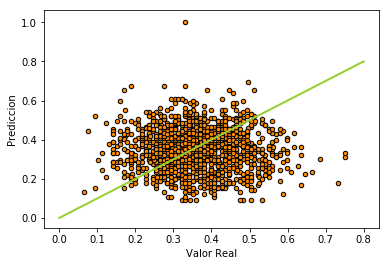

In [42]:
#plt.plot(test, Prediccion, color="yellowgreen", label="max_depth=5", linewidth=2)

plt.scatter(y_test, Prediccion, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot([0,0.8], [0,0.8], color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Valor Real")
plt.ylabel("Prediccion")
plt.savefig('Arbol1.png')

## Vamos a variar los hiperparámetros

In [45]:
Metodo = ['friedman_mse','mae']
impurity = np.array([0.1,0.2,0.3,0.4,0.5])

In [46]:
salidas = pd.DataFrame()
for i in Metodo:
  for j in impurity:
    Modelo_Arbol2 = ArbolDecision2(train,y_train,i,j)
    Prediccion = Modelo_Arbol2.predict(validation)
    EPP_Arbol = ErrorPorcentualPromedio(y_validation,Prediccion)
    ECM_Arbol = ECM(y_validation,Prediccion)
    resultados = np.array([EPP_Arbol,ECM_Arbol])
    salidas = salidas.append(pd.DataFrame(resultados))
salidas.to_csv('Salida_Arbol.csv')

---

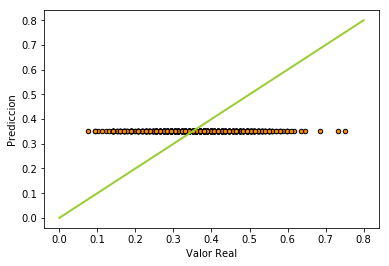

In [47]:
Prediccion2 = Modelo_Arbol2.predict(test2)
EPP_Arbol2 = ErrorPorcentualPromedio(y_test2,Prediccion2)
ECM_Arbol2 = ECM(y_test2,Prediccion2)

plt.scatter(y_test2, Prediccion2, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot([0,0.8], [0,0.8], color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Valor Real")
plt.ylabel("Prediccion")
plt.savefig('Arbol2.png')

En vista que todos los modelos que corresponden al criterio "mae" proveen un mejor ajuste en término de error, podemos evaluar el conjunto de prueba en cualquiera de estos modelos

---

# Máquina de Soporte Vectorial

In [49]:
def SVMR(train, train_y, Kernel = 'linear', polyd = 3):
  reg = svm.SVR(kernel = Kernel, degree = polyd)
  reg.fit(train, train_y)
  return reg

---

/home/bgarcial/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/bgarcial/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/bgarcial/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/bgarcial/anaconda3/lib/python3.7/site-packa

EPP SVM1 con mejor Kernel
28.63770265310825
ECM SVM1 con mejor Kernel
0.011608384240007576


/home/bgarcial/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


EPP SVM2 con mejor Kernel
28.811513360787814
ECM SVM2 con mejor Kernel
0.011543131385046434


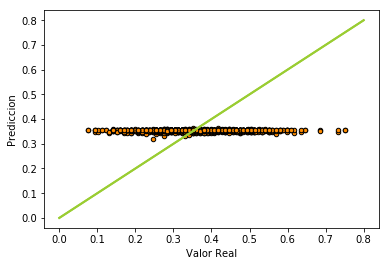

In [51]:
Kernels = np.array(['linear', 'poly', 'rbf', 'sigmoid'])
polydg  = range(2,7)

SVMRerrors = np.zeros((len(Kernels), 2))
bestPoly   = ''

for e, k in enumerate(Kernels):
  if k != 'poly':
    SVMR_Model = SVMR(train, y_train, str(k))
    Prediccion = SVMR_Model.predict(validation)
    EPP_SVM    = ErrorPorcentualPromedio(y_validation, Prediccion)
    ECM_SVM    = ECM(y_validation,Prediccion)
    SVMRerrors[e, 0] = EPP_SVM
    SVMRerrors[e, 1] = ECM_SVM
  else:
    minECM_Poly = np.inf
    for dp in polydg:
      SVMR_Model = SVMR(train, y_train, str(k), dp)
      Prediccion = SVMR_Model.predict(validation)
      ECM_SVM    = ECM(y_validation,Prediccion)
      EPP_SVM    = ErrorPorcentualPromedio(y_validation, Prediccion)
      if ECM_SVM < minECM_Poly:
        minECM_Poly = ECM_SVM
        minEPP_Poly = EPP_SVM
        bestPoly    = dp
        
    SVMRerrors[e, 0] = minEPP_Poly
    SVMRerrors[e, 1] = minECM_Poly

bestKernelEPP = str(Kernels[np.argmin(SVMRerrors[:, 0])])
bestKernelECM = str(Kernels[np.argmin(SVMRerrors[:, 1])])

if bestKernelEPP == bestKernelECM:
  SVMR_Model = SVMR(train, y_train, bestKernelEPP, bestPoly)
  Prediccion = SVMR_Model.predict(test2)
  EPP_BSVM = ErrorPorcentualPromedio(y_test2,Prediccion)
  ECM_BSVM = ECM(y_test2,Prediccion)
  
  print('EPP SVM con mejor Kernel')
  print(EPP_BSVM)
  print('ECM SVM con mejor Kernel')
  print(ECM_BSVM)
  
  plt.scatter(y_test2, Prediccion, s=20, edgecolor="black", c="darkorange", label="data")
  plt.plot([0,0.8], [0,0.8], color="yellowgreen", label="max_depth=5", linewidth=2)
  plt.xlabel("Valor Real")
  plt.ylabel("Prediccion")
  plt.savefig('SVM1.png')

else:
  # Modelo con mejor EPP
  SVMR_Model = SVMR(train, y_train, bestKernelEPP, bestPoly)
  Prediccion = SVMR_Model.predict(test2)
  EPP_BSVM = ErrorPorcentualPromedio(y_test2,Prediccion)
  ECM_BSVM = ECM(y_test2,Prediccion)
  
  print('EPP SVM1 con mejor Kernel')
  print(EPP_BSVM)
  print('ECM SVM1 con mejor Kernel')
  print(ECM_BSVM)
  
  plt.scatter(y_test2, Prediccion, s=20, edgecolor="black", c="darkorange", label="data")
  plt.plot([0,0.8], [0,0.8], color="yellowgreen", label="max_depth=5", linewidth=2)
  plt.xlabel("Valor Real")
  plt.ylabel("Prediccion")
  plt.savefig('SVM1.png')
  
  # Modelo con mejor ECM
  SVMR_Model = SVMR(train, y_train, bestKernelECM, bestPoly)
  Prediccion = SVMR_Model.predict(test2)
  EPP_BSVM = ErrorPorcentualPromedio(y_test2,Prediccion)
  ECM_BSVM = ECM(y_test2,Prediccion)
  
  print('EPP SVM2 con mejor Kernel')
  print(EPP_BSVM)
  print('ECM SVM2 con mejor Kernel')
  print(ECM_BSVM)
  
  plt.scatter(y_test2, Prediccion, s=20, edgecolor="black", c="darkorange", label="data")
  plt.plot([0,0.8], [0,0.8], color="yellowgreen", label="max_depth=5", linewidth=2)
  plt.xlabel("Valor Real")
  plt.ylabel("Prediccion")
  plt.savefig('SVM2.png')

# Red Neuronal

In [52]:
def ANN(train, train_y, hidden_layer, activationFun):
  reg = MLPRegressor(hidden_layer_sizes = hidden_layer, activation = activationFun)
  reg.fit(train, train_y)
  return reg

--- 

EPP ANN
29.064092482954308
ECM ANN
0.011552169157586074


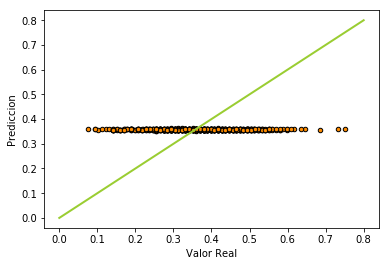

In [53]:
actFunctions = np.array(['logistic', 'tanh', 'relu'])

hl = np.array([[     (5,),        (10,),        (15,)],
               [   (5, 5),     (10, 10),     (15, 15)],
               [(5, 5, 5), (10, 10, 10), (15, 15, 15)]])


EPPRN = np.zeros((len(actFunctions), hl.shape[0], hl.shape[1]))
ECMRN = np.zeros((len(actFunctions), hl.shape[0], hl.shape[1]))

for e1, ac in enumerate(actFunctions):
  for e2, h in enumerate(hl):
    for e3, hdl in enumerate(h):
      ANN_Model  = ANN(train, y_train, hdl, ac)
      Prediccion = ANN_Model.predict(validation)
      EPPRN[e1, e2, e3] = ErrorPorcentualPromedio(y_validation, Prediccion)
      ECMRN[e1, e2, e3] = ECM(y_validation, Prediccion)
      

bestEPPLog  = np.min(EPPRN[0,:,:])
bestECMLog  = np.min(ECMRN[0,:,:])
argbestLog  = hl[np.unravel_index(ECMRN[0,:,:].argmin(), ECMRN[0,:,:].shape)]

bestEPPTan  = np.min(EPPRN[1,:,:])
bestECMTan  = np.min(ECMRN[1,:,:])
argbestTan  = hl[np.unravel_index(ECMRN[1,:,:].argmin(), ECMRN[1,:,:].shape)]

bestEPPRelu = np.min(EPPRN[2,:,:])
bestECMRelu = np.min(ECMRN[2,:,:])
argbestRelu = hl[np.unravel_index(ECMRN[2,:,:].argmin(), ECMRN[2,:,:].shape)]

bestECMFun = actFunctions[np.argmin((bestECMLog, bestECMTan, bestECMRelu))]

if bestECMFun == actFunctions[0]:
  argbesthl = argbestLog
elif bestECMFun == actFunctions[1]:
  argbesthl = argbestTan
else:
  argbesthl = argbestRelu

bestANN    = ANN(train, y_train, argbesthl, bestECMFun)
Prediccion = bestANN.predict(test2)

EPP_BANN = ErrorPorcentualPromedio(y_test2,Prediccion)
ECM_BANN = ECM(y_test2,Prediccion)

print('EPP ANN')
print(EPP_BANN)
print('ECM ANN')
print(ECM_BANN)

plt.scatter(y_test2, Prediccion, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot([0,0.8], [0,0.8], color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Valor Real")
plt.ylabel("Prediccion")
plt.savefig('ANN.png')